# Celebrity Image Classification
Here, the program would identify the face of 5 celebrities.(***Aysuhmann Khuranna, Leonardo DiCaprio, Rachel Brosnahan, Tapsee Pannu & Will Smith***)<br>
The data has been scrapped from Google Images with help of Fatkun. Chances are that these images might include the celibirty face, and also that of another person. This will need to be sorted out first.<br>
More importantly, OpenCV's haarcascade is used for the purpose of facial recognition. The haarcascade algorithm is collected from the https://github.com/opencv/opencv/tree/master/data/haarcascades .<br>
The Support Vector Machine is used for the facial recognition. The output/accuracy is fair in comparison to what a neural network would give.<br>

Below tasks are done accordingly to complete the project:
1. Gather Data through web scrapping (Fatkun).
2. Using OpenCV for image recognition.
3. Identifying & removing irrelevant or inaccurate images.
4. Feature Engineering (convert the image data to a computer language, so it can be used for Machine Learning) using Wavelets
5. Training the dataset through Machine Learning techniques from scikit-learn libraries.
6. Evaluating the best case ML Techniques and Parameters (Support Vector Machine & Logistic Regression had almost similar results. However, SVM provided slightly better results, so it is preferred here).
7. Saving the Model & Json
8. Creating a Python Flask Server("BackEnd" tasks are done in PyCharm)
9. Creating a webpage(UI) using HTML(Visual Studio Code is used for "FrontEnd" tasks)
10. Deployment of model to production using Amazon Web Services(Amazon EC2 Instance)

## Computer Vision
It involves seeing or sensing a visual stimulus, make sense of what it has seen and also extract complex information that could be used for other machine learning activities.<br>
#### USES::
- Autonomous Vehicles
- Facial Recognition
- Image Seach & Object Recognition
- Robotics
#### OPENCV
It is an opensourced library which has plenty of algorithms for facial recognition.<br>

In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/test_images/Aayushmann_112.jpg')
img.shape

(778, 474, 3)

Here the shape represents (X axis, y axis, RGB channels)<br>
RGB channels help to represent the colors in the image

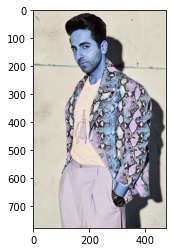

In [3]:
plt.imshow(img)

Here the image shown is colorful. However, it is not exactly as same as the one in the RAW folder.
Also, the image can be shown in black-white format also.

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(778, 474)

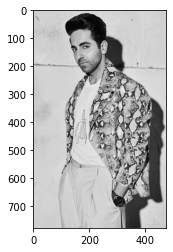

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier('C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 96,  75, 141, 141]], dtype=int32)

The array output here represents (X axis, Y axis, Width, Height)<br>
As can be seen from the image, the face starts from 62 on the X-axis, and 65 from the Y-axis.<br>
It has a width & height of 116. That means that it ranges from 62+116 on X-axis, and 65+116 on Y-axis.

In [7]:
(x, y, w, h) = faces[0]
x, y, w, h

(96, 75, 141, 141)

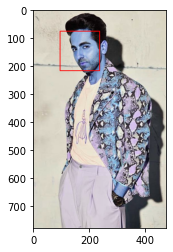

In [8]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 2)
plt.imshow(face_img)

The above code has recognised the face of Leonardo DiCaprio.<br>
`rectangle` is would draw the rectangle on the image `img`, based on the parameter `(x,y), (x+w, y+h)`. The color of rectangle is `(255,0,0)` red, which has a thickness of `2` .

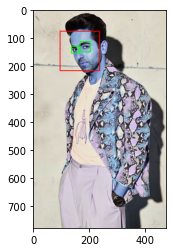

In [9]:
#below code is availabe in OpenCV portal, for the reference
cv2.destroyAllWindows()

for (x, y, w, h) in faces:
    face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x: x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
        
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

The above code will recognize the eyes of Leonardo DiCaprio.<br>
While taking in consideration the face, the code will try to figure the eyes on the face. they `ex, ew, ey, eh` are the references for eyes.<br>
There is **for** loop for the rectification of multiple faces.

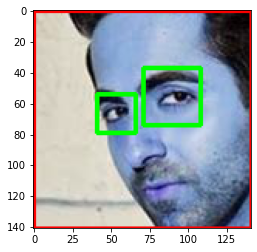

In [10]:
plt.imshow(roi_color, cmap = 'gray')

We have with us the image of Leonardo DiCaprio with his two eyes being detected. To make the image processing quicker, a function could be defined which would result to the cropped image with both eyes being discovered.|

In [11]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

The above will read the image from `image_path`, then it would convert it to gray with `face_cascade.detectMultiScale`. After that, it will detect the faces, and later eyes from those faces. <br>
The function will only return with faces, if and only if it has detected two or more eyes, i.e. `if len(eyes)>=2`.

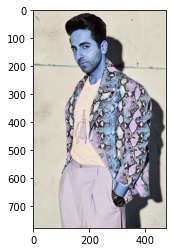

In [12]:
original_image = cv2.imread('C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/test_images/Aayushmann_112.jpg')
plt.imshow(original_image)

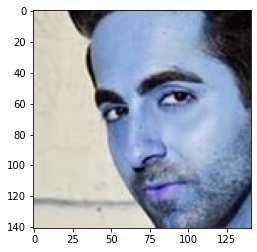

In [13]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/test_images/Aayushmann_112.jpg')
plt.imshow(cropped_image)

So, as mentioned, the code will return the cropped image, if there are two eyes are detected.

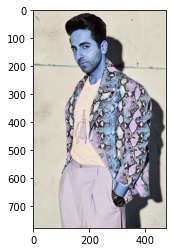

In [14]:
original_image_2 = cv2.imread('C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/test_images/Aayushmann_112.jpg')
plt.imshow(original_image_2)

In [15]:
cropped_image_2 = get_cropped_image_if_2_eyes('C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/test_images/leonardo_test_2.jpg')
cropped_image_2

The above will return NOTHING, as there is only ONE EYE DETECTION

So, now need to move the images which can be cropped, i.e., where the program is able to detect both the eyes.<br>
In order to do so, the ***cropped image*** directory needs to be created, which will store this images, for the further processing.

In [16]:
path_to_data = "C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/actual/"
path_to_cr_data = "C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/cropped/"


In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

Above will scan the directory, and go through all the sub directory in dataset folder.<br>
The name of those directory will be saved in the `img_dirs`. 

In [18]:
img_dirs

['C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/actual/ayushman_khurana',
 'C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/actual/leonardo_dicaprio',
 'C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/actual/rachel_brosnahan',
 'C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/actual/taapsee_pannu',
 'C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/actual/will_smith']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [20]:
path_to_cr_data

'C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/cropped/'

The above will first delete the folder if it is existing. And after that, it will create the folder.

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}


for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Name of folder for cropped image: ', cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
            

ayushman_khurana
Name of folder for cropped image:  C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/cropped/ayushman_khurana
leonardo_dicaprio
Name of folder for cropped image:  C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/cropped/leonardo_dicaprio
rachel_brosnahan
Name of folder for cropped image:  C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/cropped/rachel_brosnahan
taapsee_pannu
Name of folder for cropped image:  C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/cropped/taapsee_pannu
will_smith
Name of folder for cropped image:  C:/Users/Acer/Desktop/Prashant/PyCharm/Code/Celebrity Image Classification/model/datasets/cropped/will_smith


In [22]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
# celebrity_file_names_dict

In [23]:
celebrity_name

'will_smith'

After creation of the folders, the cropped image is now an in the folders. However, there are some images which are not accurate, that needs to be deleted manually.<br>
This is because Python can not process automation for that. This is were the human interferance is required. So, inorder to complete the data cleaning process, the images which are blurred, or are of other person, which are irrelevant, needs to be cleaned/deleted before we process further with the program.

## Feature Engineering

### PREREQUISITES
An image can be processed in two forms, **1> spatial domain(i.e., x-y axis) & 2> frequency domain(waveforms).<br>**
Here, the image needs to be transformed into frequecy domain, i.e., it would assume the whites & blacks in the image, and store the information in the form of sinusodial waveform. This waveform, represents the image.
However, as the image processing is requires the detailed approach, it becomes difficult to utilize the Fourier Transform. The more useful Wavelet Transform will be used to process the image.<br>
In order for machine to understand the image, the image is processed through Wavelet Transform. Wavelet transform is more advance than that of Fourier Transform.
The transformation will sepreate out the image wave form, to different frequecnies, which will give back the more truer waveform. <br>To simplify, the Fourier Transformation will give back more the original frequecny that that of the image. The original frequecy here is (zeros, and ones). The waveform with zero will represent the *blacks* and ones will represents the *whites*.


### The Idea of Wavelets
Wavelets comes as a solution to the lack of Fourier Transformation.<br>
Fourier Transformation is the dot product between real signal and various frequency of sine wave.<br>
We get a stats of frequency but we don't know when that "frequecny" happen, we lost the time resolution of the real signal.<br><br>
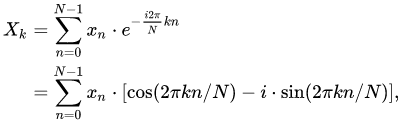
To get both the frequency and time resolution we can be dividing the original signal into the several parts and apply Fourier Transformation to each part. This is called **Short Term Fourier Transformation**. When applied to partial signal, the Frequency it can catch is just **n/2** where n is the length of partial signal assuming the duration of partial signal is 1 second.<br>
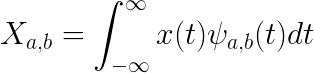
where,
- $\psi$  is so called mother wavelet,
- ${\displaystyle a}$ a denotes wavelet dilation,
- ${\displaystyle b}$ denotes time shift of wavelet and
- ${\displaystyle *}$ symbol denotes complex conjugate.
In short, the frequency below 1Hz can not be detected through Short Term Fourier Transformation.<br>
So, we need a bigger window to cath low frequency and smaller window for higher frequency and That is the idea behind Wavelets.<br>

#### Wavelets
In wavelets, the target of the bigger window is a lower frequecny. This is similar to the Fourier Transformation, because we do dot product between the real signal and some wave form.<br>
**The Wavelet translation is how far we can "slide" the window from the starting point.**<br>
**Fourier Transformation can only have 1 type of transformation, but Wavelet Transformation can have many kinds of transformation.**(possibilities are infinite)
#### Classes of Wavelet Transform
1. Continous Wavelet Transformation(CWT):
CwT is a wavelet trasnformation where we can **set the scale and translate the aribitory**.
ex. **Morlet Wavelets, Meyer Wavelets, Mexican Hat Wavelets**.
CWT will often generate a scaleogram
2. Discrete Wavelet Transformation(DWT):
DWT is a kind of wavelets which **restricts the value of scale and aribitory.** The restriction is in the increasing power of 2(a=1,2,4,8,..) and translation is the integer (b=1,2,3,4,...)
- ex. **Haar Wavelets, Daubechis Wavelets**(it has a FATHER Wavelets, which determines the scaling)

#### Simplifying the above:::
So wavelets are a type of **“orthogonal transform”**. Orthogonal transforms include variants of Fourier transforms and its cousins. They are “orthogonal” because they involve in ***“infinite summation”*** of orthogonal functions. In a **Fourier transform these are sine, cosine or complex exponential functions.**<br>

*The feature of orthogonality allows terms of unequal indices to cancel out in the calculation process of finding the transform which radically simplifies the calculation of an “infinite sum” from being horribly and impractically infinite to merely tractably infinite which calculus handles easily.<br>*

A wavelet is just a type of orthogonal function. **But the nature of a wavelet means there is no one unique function that can be used, unlike trig-based Fourier transforms**. ***Each valid orthogonal function that is “wavelet-like” is called a “mother wavelet”.<br>***

For wavelets - there are multiple orthogonal “mother” wavelet functions and each type could have an advantage in some way ranging for representation accuracy/power, economics of use or simplicity of calculation.<br>

In [24]:
#Reference: STACKOVERFLOW
import pywt #py wavelet transform library
import cv2

def w2d (img, mode='haar', level=1):
    imArray =img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    #convert float
    imArray = np.float32(imArray)
    imArray /= 255;
    #compute co-efficients
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    #Process co-efficinets
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

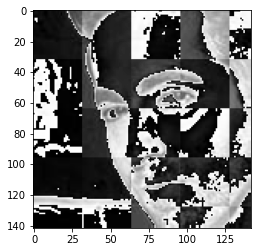

In [25]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

Now, to be more accurate with the data, and to acheive higher accuracy, the raw image (i.e., cropped_image) and the wavelet transform image(i.e., im_har) will need to be stacked vertically together.

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'ayushman_khurana': 0,
 'leonardo_dicaprio': 1,
 'rachel_brosnahan': 2,
 'taapsee_pannu': 3,
 'will_smith': 4}

In [27]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scaled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img, 'db1', 5)
        scaled_img_har = cv2.resize(img_har, (32, 32))
        stacked_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        
        X.append(stacked_img)
        y.append(class_dict[celebrity_name])

In [28]:
len(X) #total number of images

798

In [29]:
len(X[0]) #pixel of images

4096

In [30]:
32*32*3 + 32*32 # pixel is total of both raw & har images

4096

In [31]:
X = np.array(X).reshape(len(X), 4096).astype(float) #converted to float for training of dataset
X.shape

(798, 4096)

In [32]:
X[0]

array([220., 213., 198., ...,   5.,   2.,  32.])

Now, need to create the dictionary with all the images, and their path for future analysis.

In [33]:
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)    
    celebrity_file_names_dict[celebrity_name] = file_list

# celebrity_file_names_dict

## DATA TRAINING

Ideally, Support Vector Machine should perform better. However, with GridSearchCV, the target would be to determine the best model.

In [35]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.923469387755102

In [37]:
len(X_test)

196

#### F1 Score
*F1 Score* is the measure of accuracy. It is calculated from the ***precision*** and ***recall***. <br>
precision is the number of correctly identified positive results divided by the number of all positive results, including those not identified correctly<br>
Recall is the number of correctly identified positive results divided by the number of all samples that should have been identified as positive.
<br>
<br>
Suppose below is the confusion matrix.<br>
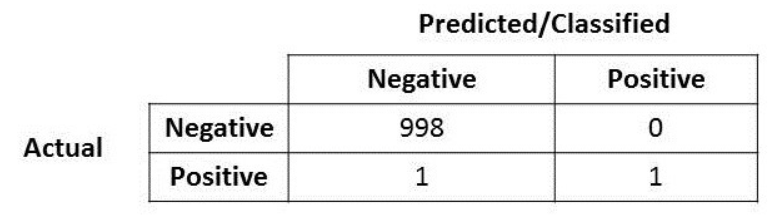
Now, the precision will be-<br>
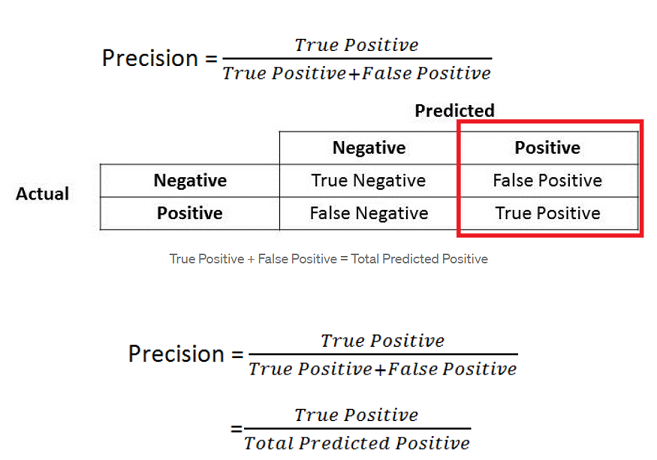
Similarly, the recall will be-<br>
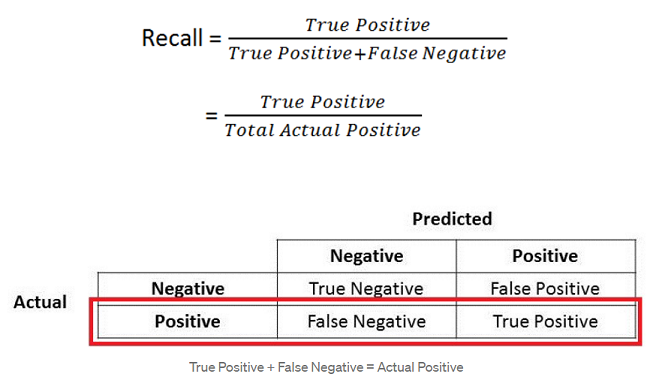
So, considering these, the F1 score can be determined as below:<br>
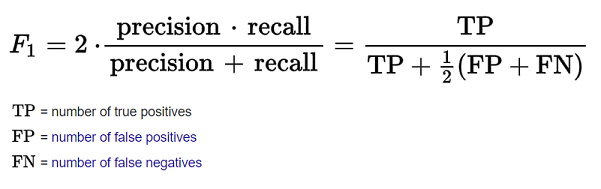

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.85      1.00      0.92        46
           2       0.95      0.95      0.95        59
           3       0.95      0.89      0.92        44
           4       1.00      0.79      0.88        19

    accuracy                           0.92       196
   macro avg       0.94      0.90      0.92       196
weighted avg       0.93      0.92      0.92       196



Here, 0> Ayushmann Khuranna 1> Leonardo DiCaprio 2>Rachel Brosnahan 3>Taapsee Pannu 4> Will Smith <br>
So, precision of 93% in class 0(Ayushman Khuranna), means that out of all the PREDICTED POSITIVES, only 93% were actually correct.<br>
Recall means that model predicted 89% correct positives, out of the total number of actual positives.

Now, using **GridSearchCV**, an optimized model needs to be identified. The model identified will be based on the Trial-N-Error basis, as there is no better way to find the better accuracy of the given model.

In [39]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [41]:
scores = []
best_estimators = {}

import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.894118,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.718441,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.907794,{'logisticregression__C': 1}


From the above, it can be understand that, the Logistic Regression gives better performance, than that of SVM. However, to decide between the two models, the TEST VALIDATION could be insightful.

In [42]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [43]:
print(best_estimators['svm'].score(X_test, y_test))
print(best_estimators['random_forest'].score(X_test, y_test))
print(best_estimators['logistic_regression'].score(X_test, y_test))

0.9387755102040817
0.7857142857142857
0.923469387755102


So, from the above, it can be understood that the SVM has better success rate on TEST VALIDATION. Although, LogisticRegression is not far off, for the sake of model selection, the SVM is prefered for the further analysis.

In [44]:
best_estimator_svm = best_estimators['svm']
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_estimator_svm.predict(X_test))
cm

array([[25,  2,  0,  1,  0],
       [ 0, 46,  0,  0,  0],
       [ 0,  2, 57,  0,  0],
       [ 2,  1,  2, 39,  0],
       [ 0,  2,  0,  0, 17]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix - SVM')

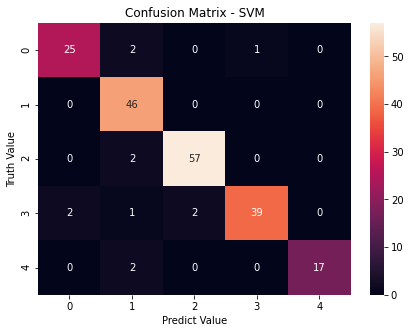

In [45]:
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predict Value')
plt.ylabel('Truth Value')
plt.title('Confusion Matrix - SVM')

In [46]:
class_dict

{'ayushman_khurana': 0,
 'leonardo_dicaprio': 1,
 'rachel_brosnahan': 2,
 'taapsee_pannu': 3,
 'will_smith': 4}

So, from above, the below conclusion could be made>>><br>
- For 27 images of Ayushman Khurana(0), model predicted 25 correctly. For 2 occasion it predicted Taapsee Pannu
- For 53 images of Leonardo DiCaprio(1), model predicted 46 correctly. It predicted 2 images as Ayushmann Khurana, 2 as Rachel Brosnanhan, 1 as Taapsee Pannu, and 2 as Will Smith
- For 59 images of Rachel Brosnahan(2), model predicted 57 correctly. For 2 occasions it predicted Taapsee Pannu
- For 40 images of Taapsee Pannu(3), model predicted 39 correctly. For 1 occasion it predicted Aysuhmann Khurana
- For 17 images of Will Smith(4), model predicted 17 correctly.<br>

In [47]:
print(classification_report(y_test, best_estimator_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        28
           1       0.87      1.00      0.93        46
           2       0.97      0.97      0.97        59
           3       0.97      0.89      0.93        44
           4       1.00      0.89      0.94        19

    accuracy                           0.94       196
   macro avg       0.95      0.93      0.94       196
weighted avg       0.94      0.94      0.94       196



From above, it can be easily interpreted that Rachel Broshnan image classification is highly accurate.

A similar anaylsis can also be performed for Logistic Regression too.

In [48]:
best_estimator_lr = best_estimators['logistic_regression']
print(classification_report(y_test, best_estimator_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.86      0.96      0.91        46
           2       0.98      0.98      0.98        59
           3       0.95      0.86      0.90        44
           4       0.88      0.79      0.83        19

    accuracy                           0.92       196
   macro avg       0.91      0.90      0.91       196
weighted avg       0.93      0.92      0.92       196



As compared to SVM, LogisticRegression has good but inferior scores.

In [49]:
import joblib
#Saving the model
joblib.dump(best_estimator_svm, 'saved_model_svm.pkl')

['saved_model_svm.pkl']

In [50]:
import json
#Saving the dictionaries for further use
with open("class_dictionary.json", "w") as f:
    f.write(json.dumps(class_dict))